This lab is based on a lab by Bard Ehrmentrout at the University of Pittsburgh (http://math.bu.edu/people/mak/MA666/11_FitzHugh_Nagumo.pdf).

Brains are composed of staggeringly complex networks of cells called *neurons* (pictured below). Neurons have two sides. The dendrites receive inputs from other neurons in the form of ions that alter the electrical background of the fluid the cell sits in. When this background passes a threshhold, the neuron *fires*, sending an electrical signal down the axon and triggering the axon terminals to emit ions that will trigger firing in the next neurons in the network.

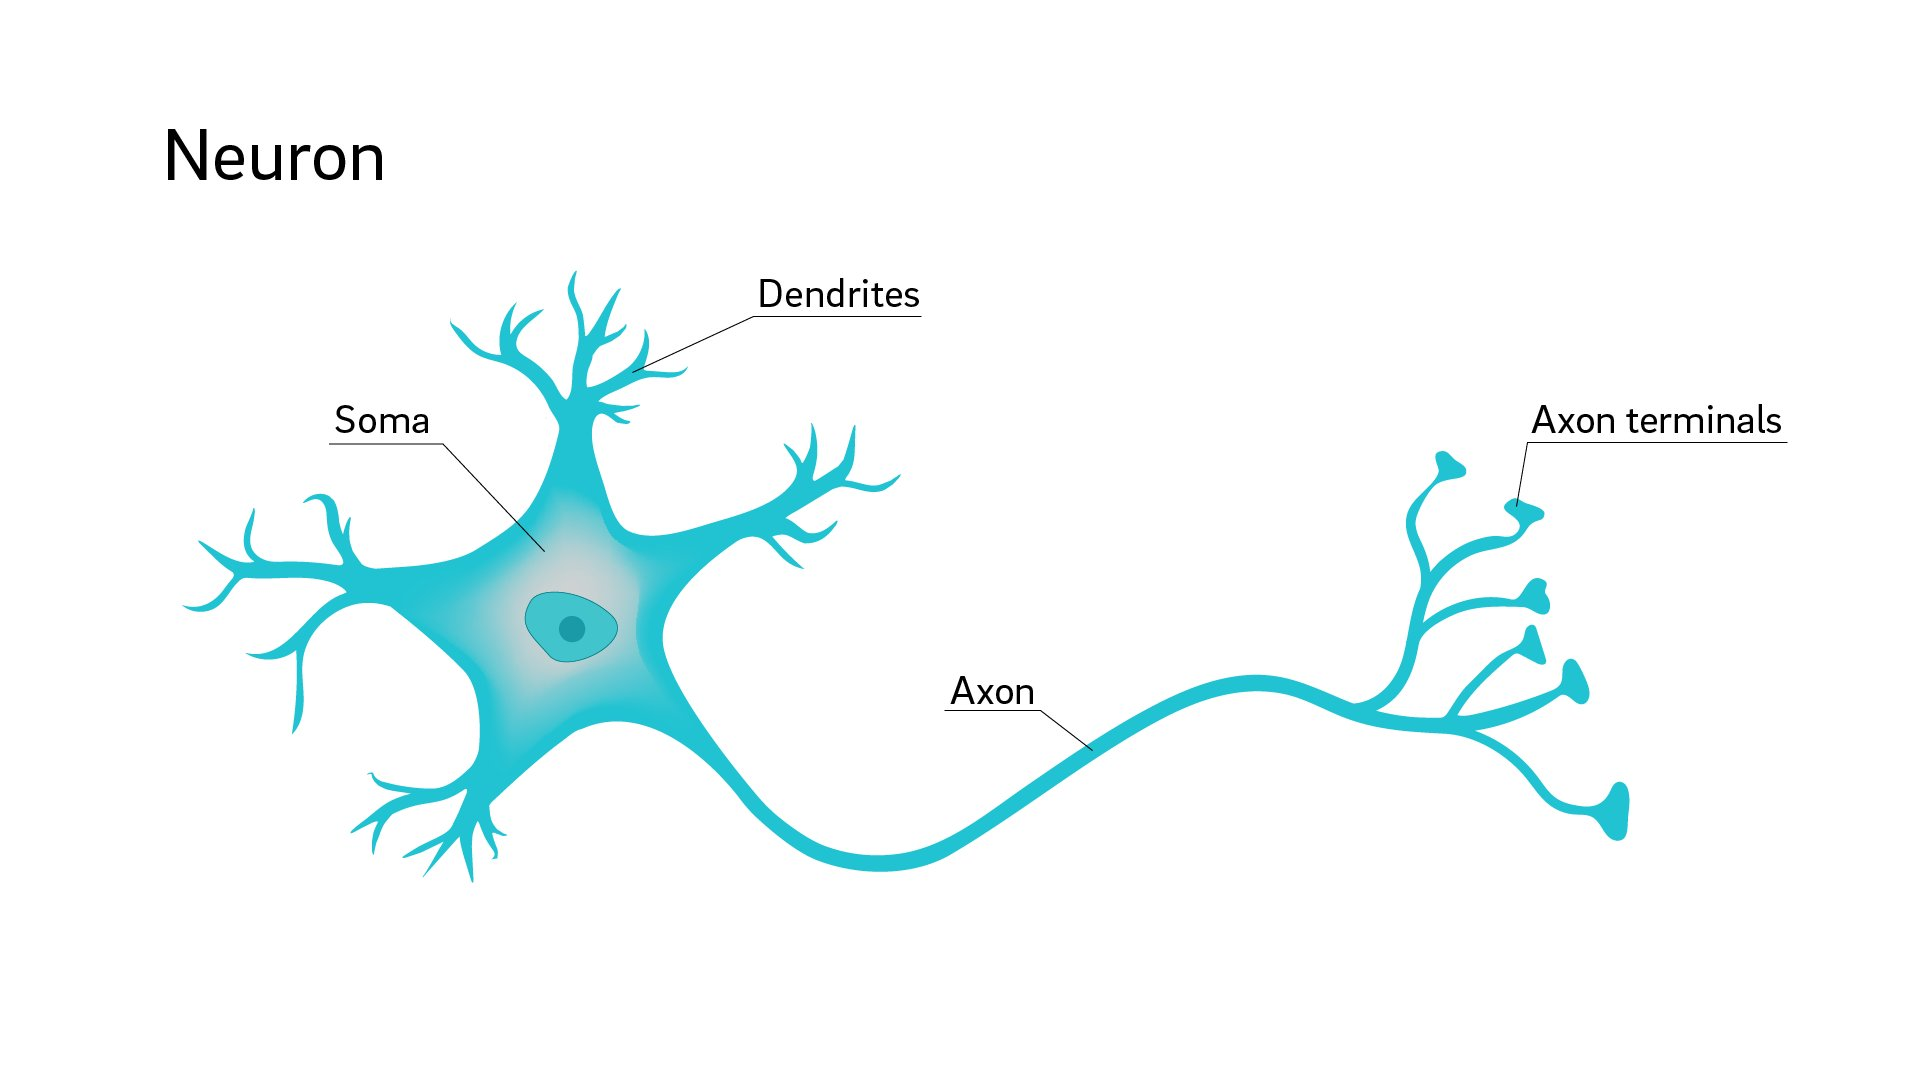
Source: https://medicalxpress.com/news/2018-07-neuron-axons-spindly-theyre-optimizing.html

This allows the network of cells to function like components of a computer that send zeros (not firing) and ones (fire!) throughout the network. Alan Hodgkin and Andrew Huxley first developed a mathematical model for the firing of a neuron, specifically the squid giant axon. They were awarded the Nobel Prize in Physiology or Medicine in 1963, the year after Watson and Crick.

The Hodgkin-Huxley model is a system of four differential equations. This is a bit complicated to visualize. In 1961 Richard FitzHugh proposed a simplified version of this model that had only two variables. The following year, Japanese scientist J. Nagumo built an electrical circuit with those exact dynamics (SageMath didn't exist yet, so they had no easy way to simulate solutions!)

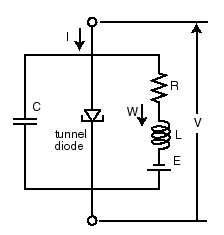
Tha Nagumo Circuit (source: http://www.scholarpedia.org/article/FitzHugh-Nagumo_model)

# The Model

The FitzHugh-Nagumo model has two independent variables: the membrane potential $V$ and the recovery variable $W$. The goal was to capture the excitation and propagation phenomena from the chemical and electrical phenomena that triggered them. The membrane potential has a cubic nonlinearity that allows it to rapidly self-excite itself through positive feedback (as $V$ grows larger, $\frac{dV}{dt}$ grows larger still). It is limited only by the recovery variable that linearly provides negative feedback. The recovery variable grows when the membrane potential is high, allowing it to eventually ease the spike back to normal levels. The membrane potential is also subject to a constant forcing $I$ that can be understood as the inputs to the dendrites. Together, we get:

$$
\begin{align*}
\frac{dV}{dt} &= V - \frac{V^3}{3} - W + I\\
\frac{dW}{dt} &= a(V-bW+c)
\end{align*}
$$

where $f(V)$ is a cubic function and $a$, $b$, and $c$ are positive parameters. For this lab, we will let $a = 0.08$, $b = 0.8$, $c = 0.7$.

1. When V is large and positive, what happens? When V is very negative, what happens? When V is close to zero, what happens? Write your answers in the Markdown cell below.

When $V$ is very large and positive $\frac{dV}{dt}$ becomes very negative, and $frac{dw}{dt}$ becomes positive.  When $V$ is very large and negative, $\frac{dV}{dt}$ becomes very large and positive, $\frac{dW}{dt}$ becomes negative. When $V$ is close to zero both $\frac{dV}{dt}$ and $\frac{dW}{dt}$ become negative as they will be dominated by $-W$ terms. 

# Analysis

2. Let's begin by setting $I = 0$, indicating no external stimulus.

a. How many equilibrium points are there?

b. What is the stability of each?

c. Convince me of the number and stability of each equilibrium point in two ways.

There is one equilibrium point occuring at v = -1.199 and w = -0.624 found by setting v' = 0 and w' = 0 and then solving the system of equations. Using the jacobian matrix $$\begin{bmatrix} 1-v^2 & -1 \\ 0.08 & -0.064 \\ \end{bmatrix}$$ evaluated at the equilibrium point, the trace t is equal to -0.5016, the determinent d = 0.108. So, t is < 0 and t^2-4d < 0 so the system is a spiral sink around the equilibrium point. Alternativly the eigenvalues of the jacobian matrix are [-0.250800500000000 - 0.212380726996943*I, -0.250800500000000 + 0.212380726996943*I] which means a spiral sink since the real part is negative in both eigenvalues. 

In [11]:
A = matrix([[1-1.199^2, -1], [0.08, -0.064]])
d = det(A)


A.eigenvalues()

<ipython-input-11-b7780276c177>:5: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
  A.eigenvalues()


[-0.250800500000000 - 0.212380726996943*I, -0.250800500000000 + 0.212380726996943*I]

3. Find formulae for the V-nullclines and the W-nullclines when $I = 0$ and plot them together in different colors over the phase portrait. Place $V$ on the x-axis and W on the y-axis.

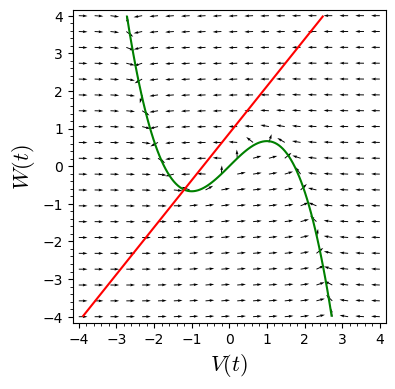

In [48]:
v, w, t = var('v w t')
a = 0.08
b = 0.8
c = 0.7
F = [v-(v^3)/3 - w,a*(v - b*w + c)]
n = sqrt(F[0]^2 + F[1]^2)
F_unit = [F[0]/n, F[1]/n] #set all vectors in the vector field to be same length
p = plot_vector_field(F_unit, (v,-4,4), (w,-4,4), axes_labels=['$V(t)$','$W(t)$'], xmax = 4, xmin = -4, ymax = 4, ymin = -4, aspect_ratio=1)
p += implicit_plot(F[0], (v,-4,4), (w,-4,4), color="green")
p += implicit_plot(F[1], (v,-4,4), (w,-4,4), color="red")
p

# V nullcline is w = v - (v^3)/3
# W nullcline is v = 0.8*w - 0.7


4. Use plots or mathematical demonstrations to describe what happens to the system as $I$ increases from zero. How does the phase portrait change? Are there any bifurcations? Do not find any solution trajectories (yet).

As I increases from zero, the system only has one equilibrium solution which remains a spiral sink. This can seen in the jacobian matrix $$J=\begin{bmatrix} 1-v^2 & -1 \\ 0.08 & -0.064 \\ \end{bmatrix}$$ which does not depend on I. As you increase I, the intersection between the nullclines moves steadily down the v nullcline (green above), accordingly, the equilibrium solution changes, turning positive. There are no bifurcations since there is only one equilibrium solution no matter the value of I. 

5. Choose a fixed initial condition. For several choices of $I$, solve the system and plot the solution trajectory in the phase plane (alongside the nullclines). Also plot the $V(t)$ solution on its own axis. Be sure to demonstrate several different patterns of behavior such as no spike, one spike, and a "spike train."

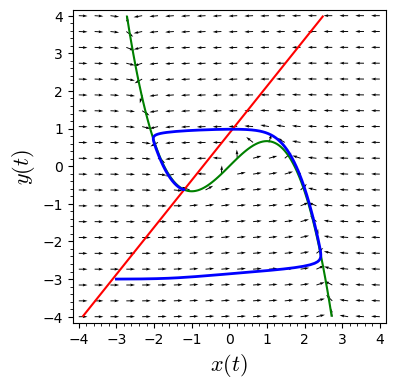

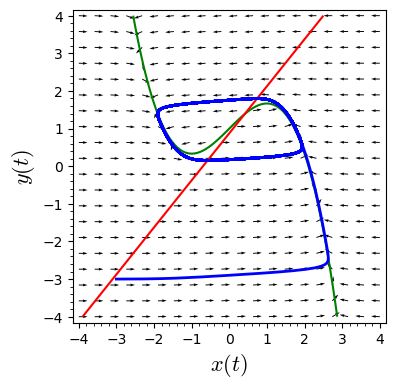

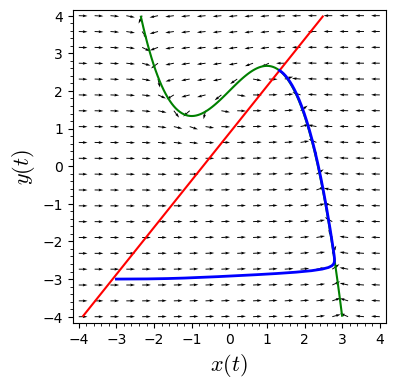

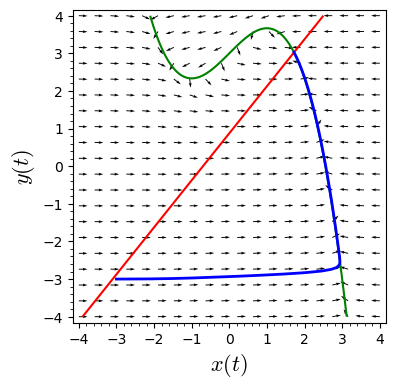

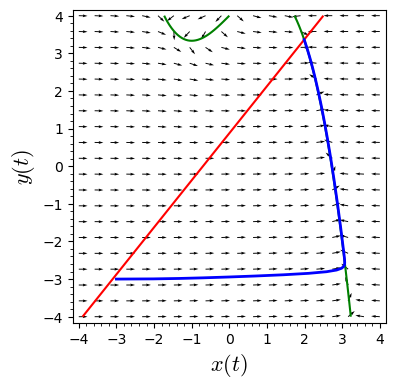

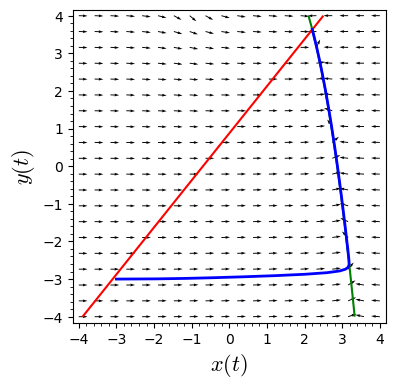

In [60]:
for i in range(6):
    v, w, t = var('v w t')
    a = 0.08
    b = 0.8
    c = 0.7
    I=i
    F = [v-(v^3)/3 - w+I,a*(v - b*w + c)]

    P = desolve_system_rk4(F,[v, w],ics=[0,-3,-3],ivar=t,end_points=500,step=0.1)
    Q = [ [j,k] for i,j,k in P]
    p = line(Q, axes_labels=['$v(t)$','$w(t)$'], thickness=2)

    n = sqrt(F[0]^2 + F[1]^2)
    F_unit = [F[0]/n, F[1]/n] #set all vectors in the vector field to be same length
    p += plot_vector_field(F_unit, (v,-4,4), (w,-4,4), axes_labels=['$x(t)$','$y(t)$'], xmax = 4, xmin = -4, ymax = 4, ymin = -4, aspect_ratio=1)

    p += implicit_plot(F[0], (v,-4,4), (w,-4,4), color="green")
    p += implicit_plot(F[1], (v,-4,4), (w,-4,4), color="red")
    
    show(p)

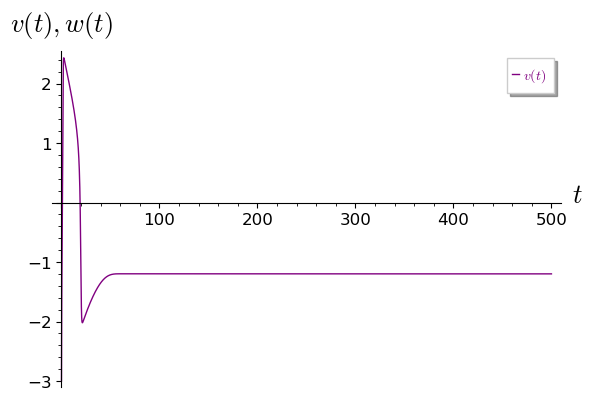

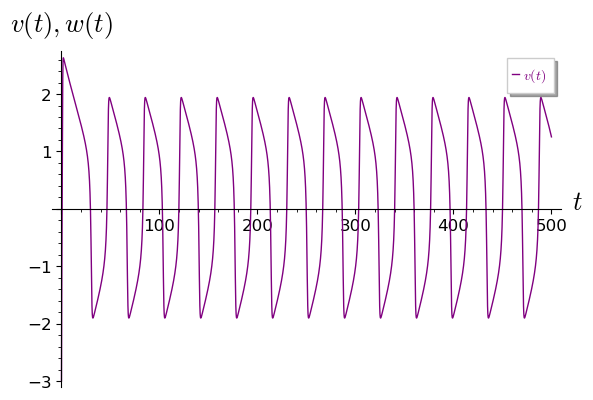

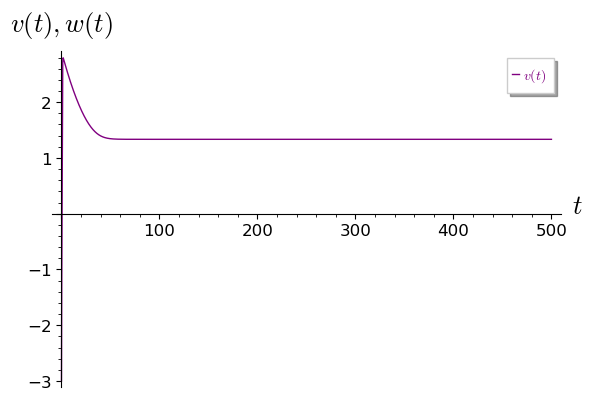

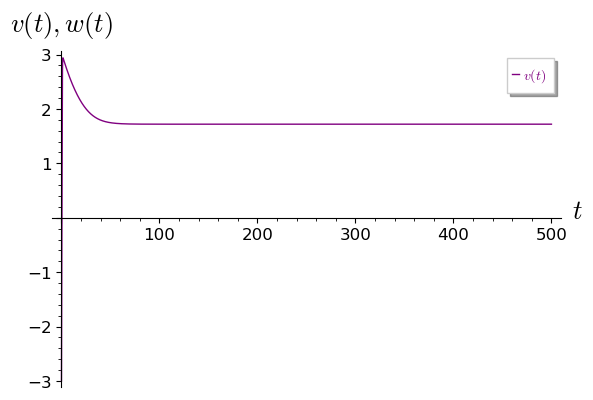

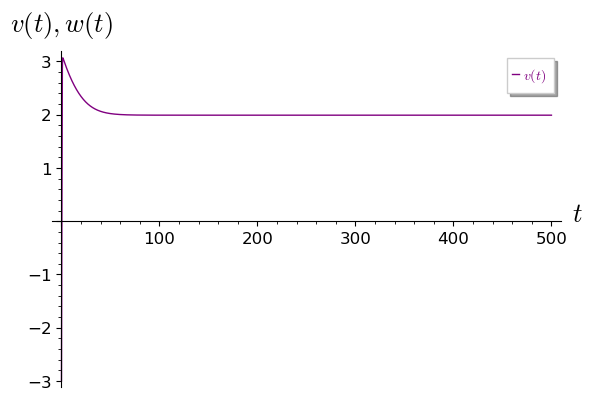

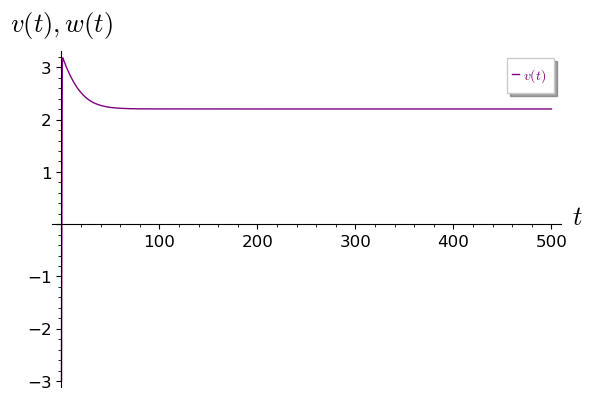

In [58]:
for i in range(6):
    v, w, t = var('v w t')
    a = 0.08
    b = 0.8
    c = 0.7
    I=i
    F = [v-(v^3)/3 - w+I,a*(v - b*w + c)]

    P = desolve_system_rk4(F,[v, w],ics=[0,-3,-3],ivar=t,end_points=500,step=0.1)
    Q = [ [i, j] for i,j,k in P]
    
    z = line(Q, color='purple', axes_labels=['$t$','$v(t), w(t)$'], legend_label='$v(t)$', legend_color='purple', fontsize=12)
    show(z)

6. When $I$ is sufficiently low, there is no repetitive spiking. When $I$ is too high, there is also no repetitive spiking. 

a. Demonstrate that this is the case (analytically or numerically or both - your choice!)

b. Why might this be useful for a neuron's function?

Using the runge-kutta numerical approximation of the solution, it is clear that there are no repetitive spikes when I = 0 or when I = 6, but from above, there are repetitive spikes when I = 1.  This may be useful for a neuron's function because the neuron will start firing once the membrane reaches a certain threshold potential which sends ions to other neurons signalling them to start firing as well. When I is too high, the repetitive spikes stop, perhapse this is to protect the neuron from being damaged? or part of a biological circuit similar to a electrical logic circuit with an xor gate. 

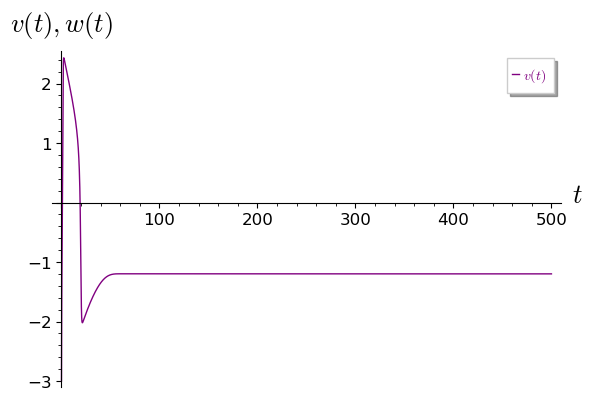

In [62]:
v, w, t = var('v w t')
a = 0.08
b = 0.8
c = 0.7
I=0
F = [v-(v^3)/3 - w+I,a*(v - b*w + c)]
P = desolve_system_rk4(F,[v, w],ics=[0,-3,-3],ivar=t,end_points=500,step=0.1)
Q = [ [i, j] for i,j,k in P]
    
z = line(Q, color='purple', axes_labels=['$t$','$v(t), w(t)$'], legend_label='$v(t)$', legend_color='purple', fontsize=12)
show(z)

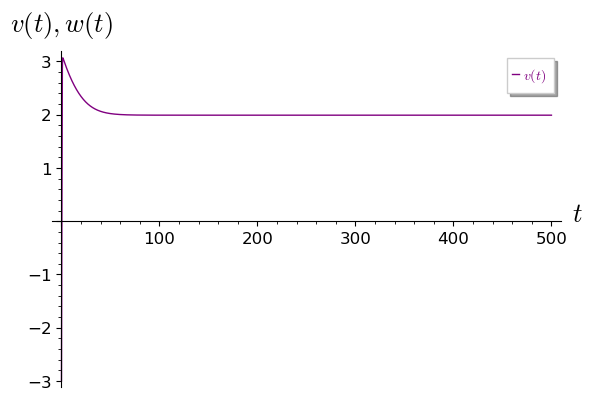

In [64]:
v, w, t = var('v w t')
a = 0.08
b = 0.8
c = 0.7
I=4
F = [v-(v^3)/3 - w+I,a*(v - b*w + c)]
P = desolve_system_rk4(F,[v, w],ics=[0,-3,-3],ivar=t,end_points=500,step=0.1)
Q = [ [i, j] for i,j,k in P]
    
z = line(Q, color='purple', axes_labels=['$t$','$v(t), w(t)$'], legend_label='$v(t)$', legend_color='purple', fontsize=12)
show(z)

7. Suppose our neuron is at equilibrium with $I = 0$. 

a. If $I$ changes suddenly to $I = 0.4$, what happens?

b. If $I$ changes gradually to $I = 0.4$ (say, $I(t) = 0.4-0.4e^{-0.005t}$), what happens?

c. How would this behavior be useful for a neuron's function?

If I changes suddenly from I =0 to I = 0.4, the neuron immediately starts spiking in voltage. If I gradually increases to 0.4, then the neuron will start making small spikes and eventually increase to full size spikes as I approaches 0.4. I found the spikes to occur very suddenly around I = 0.32.  At I = 0.31 the neuron definitely makes small spikes. This would be useful for a neuron's function because it allows different responses to different stimuli. For instance, a membrane potential of 0.31 may only warrant a small response while a signal of greater potential warrants a larger response meaning bigger spikes.  Brains respond more intensely to some things than others, like seeing a pebble on the ground warrants basically no response, but seeing a glowing cat would warrant a large response from neurons. 

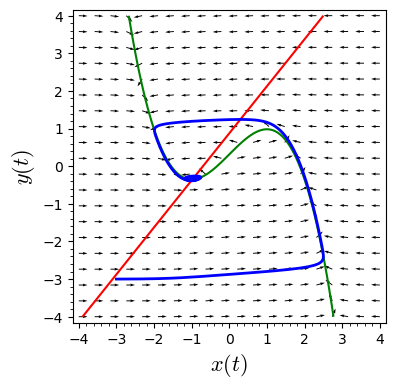

In [76]:
v, w, t = var('v w t')
a = 0.08
b = 0.8
c = 0.7
I=0.315
F = [v-(v^3)/3 - w+I,a*(v - b*w + c)]

P = desolve_system_rk4(F,[v, w],ics=[0,-3,-3],ivar=t,end_points=500,step=0.1)
Q = [ [j,k] for i,j,k in P]
p = line(Q, axes_labels=['$v(t)$','$w(t)$'], thickness=2)

n = sqrt(F[0]^2 + F[1]^2)
F_unit = [F[0]/n, F[1]/n] #set all vectors in the vector field to be same length
p += plot_vector_field(F_unit, (v,-4,4), (w,-4,4), axes_labels=['$x(t)$','$y(t)$'], xmax = 4, xmin = -4, ymax = 4, ymin = -4, aspect_ratio=1)

p += implicit_plot(F[0], (v,-4,4), (w,-4,4), color="green")
p += implicit_plot(F[1], (v,-4,4), (w,-4,4), color="red")

show(p)

## Bibliography

(1) Ehrmentrout, Bard. http://math.bu.edu/people/mak/MA666/11_FitzHugh_Nagumo.pdf. Accessed 15 July 2020.

(2) FitzHugh, R. and Izhikevich, E. "FitzHugh-Nagumo Model." *Scholarpedia*. http://www.scholarpedia.org/article/FitzHugh-Nagumo_model. Accessed 15 July 2020.